In [52]:
import pandas as pd
import re
from textblob import TextBlob
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Evaluation-dataset.csv')
df.head()

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Evaluation-dataset.csv', header=None)  # Reading without assuming a header

# Step 2: Define the desired column names
desired_column_names = ['Review Text', 'Garage Service Sentiment', 'Ease of Booking Sentiment']

# Step 3: Check the number of columns in the DataFrame and handle the renaming accordingly
num_columns = len(df.columns)
num_desired_columns = len(desired_column_names)

# Rename the first few columns with the desired names
df.columns = desired_column_names + [f'Unnamed_{i}' for i in range(num_desired_columns, num_columns)]

# Step 4: Remove the unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Save the modified DataFrame to a new CSV file (if needed)
df.to_csv('Modified-Evaluation-dataset.csv', index=False)

df.head()


,Review Text,Garage Service Sentiment,Ease of Booking Sentiment
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive
2,Very easy to use and good value for money.,value for money positive,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive


In [ ]:
total_elements = df.size
nan_count = df.isna().sum().sum()
nan_percentage = (nan_count / total_elements) * 100

# Create a new DataFrame to store the NaN percentage information
nan_percentage_df = pd.DataFrame({'NaN Percentage': [nan_percentage]})

# Display the DataFrame with the NaN percentage
nan_percentage_df

,NaN Percentage
0,25.977102


In [ ]:
df_filled = df.apply(lambda x: x.fillna(x.mode()[0]))

# Display the DataFrame with NaN values replaced using mean
print(df_filled)
df_filled.head()

                                             Review Text  \
0      Tires where delivered to the garage of my choi...   
1      Easy Tyre Selection Process, Competitive Prici...   
2             Very easy to use and good value for money.   
3                  Really easy and convenient to arrange   
4      It was so easy to select tyre sizes and arrang...   
...                                                  ...   
10127  I ordered the wrong tyres, however [REDACTED] ...   
10128  Good experience, first time I have used [REDAC...   
10129  I ordered the tyre I needed on line, booked a ...   
10130  Excellent service from point of order to fitti...   
10131  Seamless, well managed at both ends. I would r...   

         Garage Service Sentiment      Ease of Booking Sentiment  
0         garage service positive       ease of booking positive  
1         garage service positive       value for money positive  
2        value for money positive       value for money positive  
3        ea

,Review Text,Garage Service Sentiment,Ease of Booking Sentiment
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive
2,Very easy to use and good value for money.,value for money positive,value for money positive
3,Really easy and convenient to arrange,ease of booking positive,value for money positive
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive


In [ ]:
total_elements = df_filled.size
nan_count = df_filled.isna().sum().sum()
nan_percentage = (nan_count / total_elements) * 100

# Print the percentage of NaN values
print(f"Percentage of NaN values in the dataset: {nan_percentage:.2f}%")

Percentage of NaN values in the dataset: 0.00%


# Step 1: Data Preparation


In [ ]:
import nltk
nltk.download('brown')
nltk.download('punkt')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    tokens = text.split()
    return tokens

# Define subthemes and their keywords

In [ ]:
subthemes = {
    'garage service': ['garage', 'service', 'mechanic', 'staff'],
    'wait time': ['delay', 'wait', 'time'],
    'incorrect tyres sent': ['incorrect', 'wrong', 'tyres', 'sent']
}

# Step 2: Subtheme Identification

In [ ]:
def identify_subthemes(tokens, subthemes):
    identified_subthemes = defaultdict(list)
    for token in tokens:
        for subtheme, keywords in subthemes.items():
            if token in keywords:
                identified_subthemes[subtheme].append(token)
    return identified_subthemes

# Step 3: Sentiment Analysis

In [ ]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

# Step 4: Mapping Subthemes to Sentiments

In [ ]:
def subtheme_sentiment_analysis(review, subthemes):
    tokens = preprocess_text(review)
    identified_subthemes = identify_subthemes(tokens, subthemes)
    results = {}
    for subtheme in identified_subthemes:
        sentiment = analyze_sentiment(review)
        results[subtheme] = sentiment
    return results

# Example review

In [ ]:
review = "One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt with it was fantastic."


# Perform Subtheme Sentiment Analysis

In [ ]:
results = subtheme_sentiment_analysis(review, subthemes)
print(results)

{'wait time': 'positive', 'incorrect tyres sent': 'positive', 'garage service': 'positive'}


## Subtheme Identification and Sentiment **Analysis**

In [50]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = text.split()
    return tokens

# Define subthemes and their keywords
subthemes = {
    'garage service': ['garage', 'service', 'mechanic', 'staff'],
    'wait time': ['delay', 'wait', 'time'],
    'incorrect tyres sent': ['incorrect', 'wrong', 'tyres', 'sent']
}

def identify_subthemes(tokens, subthemes):
    identified_subthemes = defaultdict(list)
    for token in tokens:
        for subtheme, keywords in subthemes.items():
            if token in keywords:
                identified_subthemes[subtheme].append(token)
    return identified_subthemes

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

def subtheme_sentiment_analysis(review, subthemes):
    tokens = preprocess_text(review)
    identified_subthemes = identify_subthemes(tokens, subthemes)
    results = {}
    for subtheme in identified_subthemes:
        sentiment = analyze_sentiment(review)
        results[subtheme] = sentiment
    return results


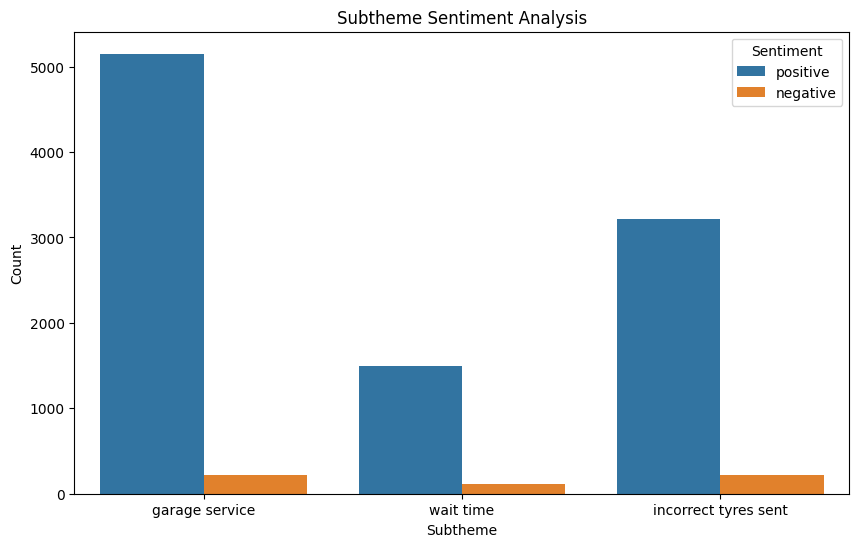

In [53]:
# Perform Subtheme Sentiment Analysis on each review
all_results = []
for review in df_filled['Review Text']:
    results = subtheme_sentiment_analysis(review, subthemes)
    all_results.append(results)

# Aggregate the Results
sentiment_counts = defaultdict(Counter)
for result in all_results:
    for subtheme, sentiment in result.items():
        sentiment_counts[subtheme][sentiment] += 1

# Convert the aggregated results to a DataFrame for visualization
df_visualization = pd.df_filled(sentiment_counts).T.reset_index().melt(id_vars='index')
df_visualization.columns = ['Subtheme', 'Sentiment', 'Count']

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Subtheme', y='Count', hue='Sentiment', data=df_visualization)
plt.title('Subtheme Sentiment Analysis')
plt.xlabel('Subtheme')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
